In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import openpyxl 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

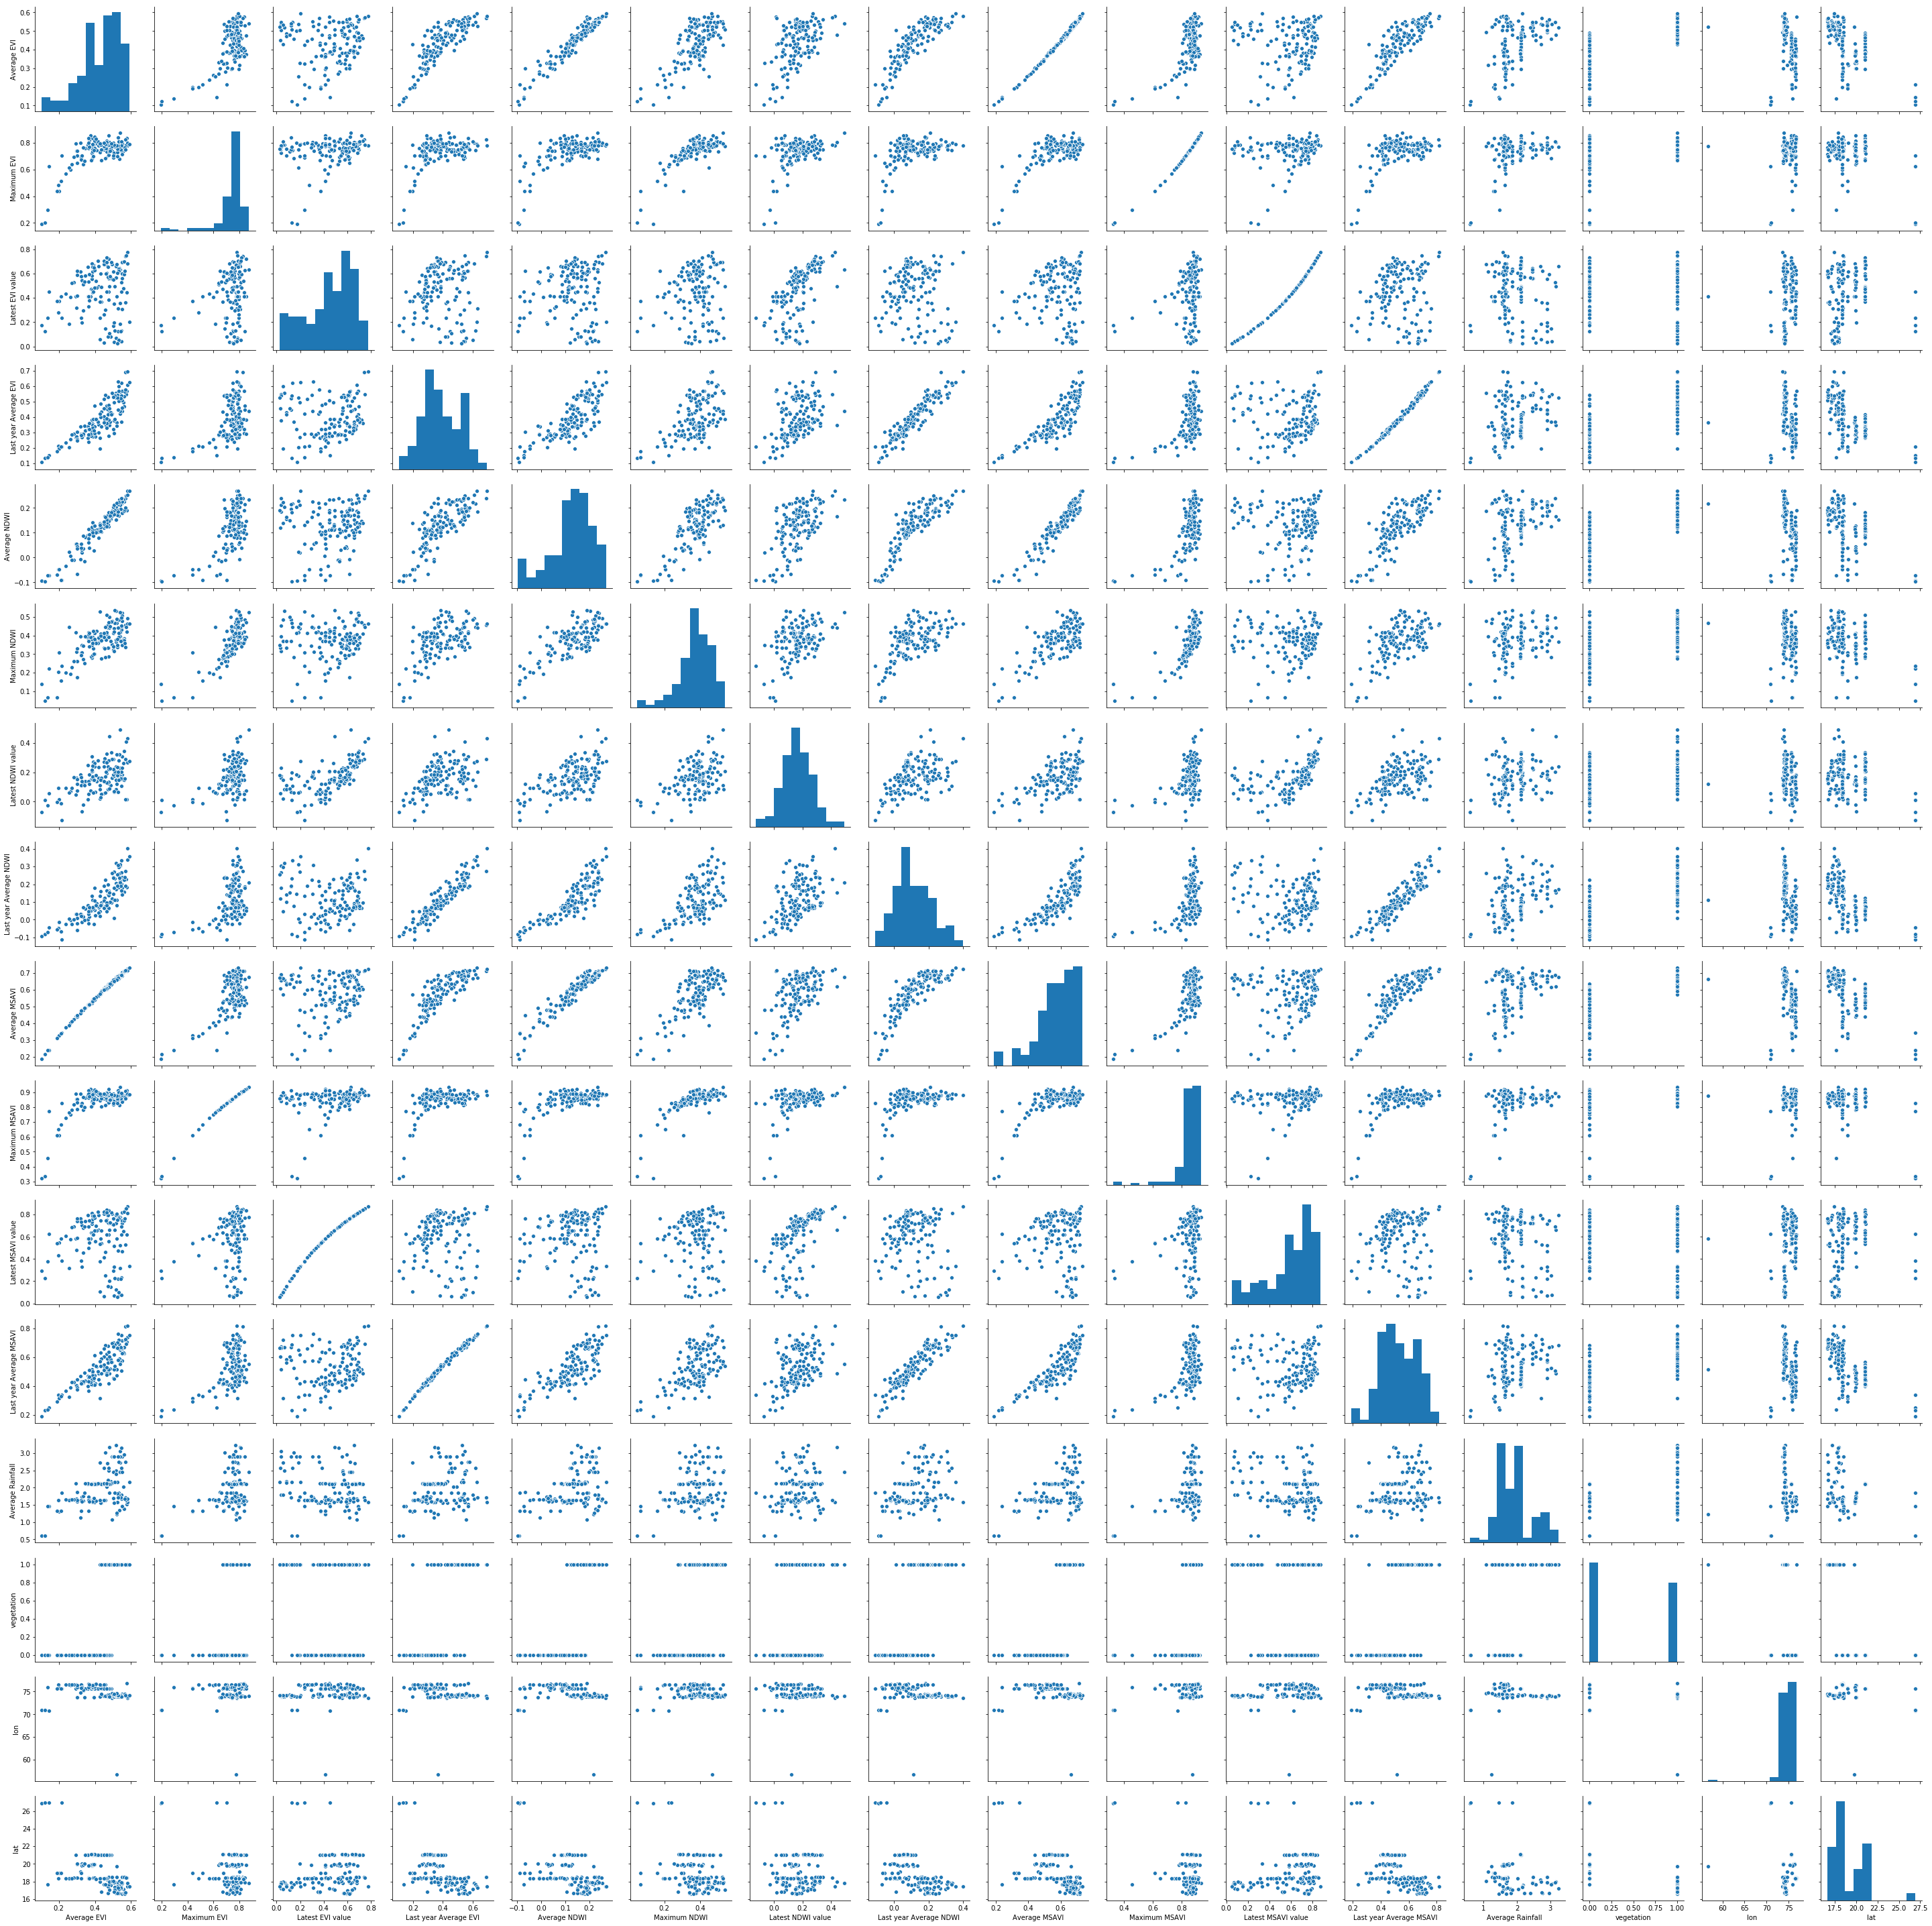

In [3]:
df=pd.read_csv("dataset_test.csv")
sns.pairplot(df)

In [9]:
df.drop(['Maximum EVI','Latest EVI value','Last year Average EVI','Maximum NDWI','Latest NDWI value','Last year Average NDWI','Maximum MSAVI','Latest MSAVI value','Last year Average MSAVI'], axis = 1, inplace = True)

KeyError: "['Maximum EVI' 'Latest EVI value' 'Last year Average EVI' 'Maximum NDWI'\n 'Latest NDWI value' 'Last year Average NDWI' 'Maximum MSAVI'\n 'Latest MSAVI value' 'Last year Average MSAVI'] not found in axis"

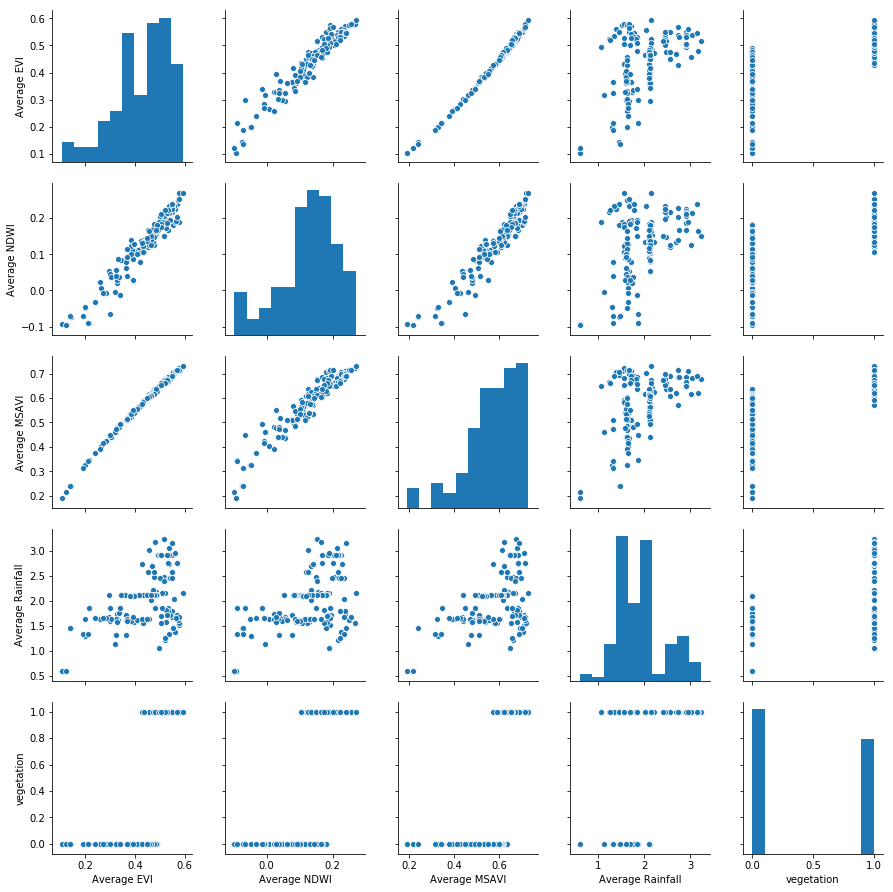

In [10]:
sns.pairplot(df)

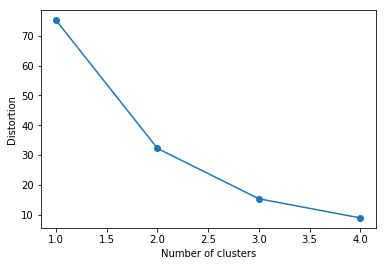

In [14]:

#calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 5):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    distortions.append(km.inertia_)

#plot
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [15]:
X = np.array(df).astype(float)

In [16]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
a = kmeans.predict(X)

In [17]:
df['Drought_Severity'] = a
df.to_csv('Clustering_done1.csv')

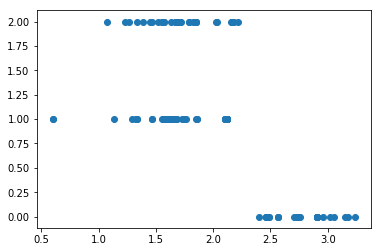

In [26]:
plt.scatter(df['Average Rainfall'],a)

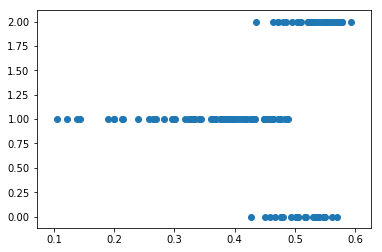

In [27]:
plt.scatter(df['Average EVI'],a)

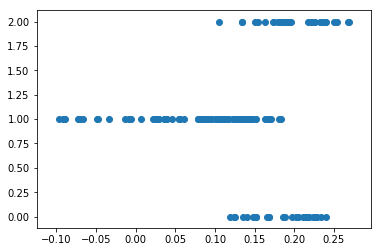

In [28]:
plt.scatter(df['Average NDWI'],a)

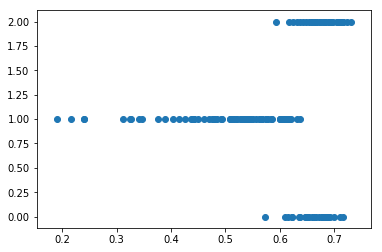

In [29]:
plt.scatter(df['Average MSAVI'],a)

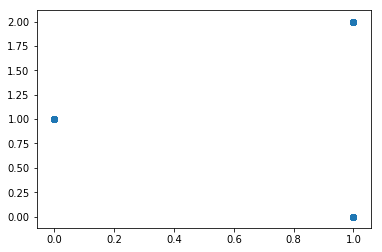

In [30]:
plt.scatter(df['vegetation'],a)

In [31]:
df=pd.read_csv('Clustering_done1.csv')
X=df[['Average EVI','Average NDWI','Average MSAVI','Average Rainfall','vegetation']]
y=df['Drought_Severity']
C = 1.0              #gamma : varied c:bias
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [65]:
test_size=0.4

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [67]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
prediction = svc.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00        16
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        35
   macro avg       0.97      0.97      0.96        35
weighted avg       0.97      0.97      0.97        35



In [71]:
import sklearn
print("The accuracy of the model is",(sklearn.metrics.accuracy_score(y_test, prediction))*100,"%")   #converting accuracy score to %

The accuracy of the model is 97.14285714285714 %


In [75]:
svc.probability=True

In [76]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
prediction = svc.predict_proba(X_test)

In [79]:
print(prediction)

[[0.68579354 0.03703046 0.277176  ]
 [0.02040413 0.96115664 0.01843923]
 [0.01446102 0.02777813 0.95776085]
 [0.0209622  0.96052885 0.01850895]
 [0.03130827 0.02716348 0.94152825]
 [0.40232967 0.03690568 0.56076465]
 [0.00524232 0.9790169  0.01574078]
 [0.00207478 0.98226649 0.01565873]
 [0.00526146 0.97895972 0.01577883]
 [0.01064538 0.02812623 0.96122839]
 [0.31186888 0.03494856 0.65318256]
 [0.01432893 0.02811587 0.95755519]
 [0.00625296 0.97781561 0.01593143]
 [0.00539321 0.9788452  0.01576159]
 [0.00712075 0.97701454 0.01586471]
 [0.00888079 0.9749588  0.01616041]
 [0.02050535 0.96113012 0.01836454]
 [0.96577386 0.01879222 0.01543392]
 [0.02514767 0.02708924 0.94776309]
 [0.96572034 0.0187924  0.01548726]
 [0.97932075 0.01434284 0.00633641]
 [0.84907581 0.0326592  0.11826499]
 [0.00550718 0.97885937 0.01563345]
 [0.01042866 0.02829617 0.96127517]
 [0.02110888 0.96036137 0.01852975]
 [0.96604063 0.01861437 0.015345  ]
 [0.9662993  0.01844133 0.01525937]
 [0.00541178 0.97899162 0.01